In [3]:
username = "Alex"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\integrate\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

TM6_glial_ECM_help (generic function with 1 method)

In [4]:
using StaticArrays, DifferentialEquations, DynamicalSystems, ForwardDiff, BenchmarkTools, IntervalRootFinding 
using CairoMakie, GLMakie
using LinearAlgebra

In [5]:
integ_set = (alg = Vern9(), adaptive = true, abstol = 1e-11, reltol = 1e-11);
tstep = 0.001; t = 1000;

In [6]:
u0 = [0.9445509341100914, 0.74116702856987, 0.7361196042973006, 0.0646914552140727, 0.15145764079879162, 0.0009327645775731449];

param = TM6_glial_ECM_get_params();
dict, indexparams = TM6_glial_ECM_help(param);

param[11] =  -1.741; #I0
param[6] = 0.067; # αE

In [14]:
αE_start = 0.067; αE_end = 0.0; len_range = 3000;
αE_range = range(αE_start, αE_end, length = len_range)

index_control_param = 6;

index_fix_var = 2;
val_fixed_var = 0.75;
surface = (index_fix_var, val_fixed_var);

setting_root = (xrtol = 1e-15, atol = 1e-20);

In [7]:
ds= CoupledODEs(TM6_glial_ECM, u0, param, diffeq = integ_set);

In [12]:
pmap = PoincareMap(ds, surface, rootkw = setting_root)

6-dimensional PoincareMap
 deterministic: true
 discrete time: true
 in-place:      false
 dynamic rule:  TM6_glial_ECM
 hyperplane:    (2, 0.75)
 crossing time: 0.6259415085442768
 parameters:    [0.013, 0.15, 1.0, 1.8, 1.5, 0.067, 0.001, 0.01, 3.07, 0.3  …  0.0, 1.0, 0.15, 25.6, 0.0, 1.0, 26.0, 0.05, 0.5, 0.9]
 time:          0
 state:         [0.9574027495548755, 0.7499999999999979, 0.7334198031908865, 0.06456535697759053, 0.15145639642660944, 0.0009326909257942102]


In [15]:
index_save_var = 1
output = orbitdiagram(pmap, index_save_var, index_control_param, αE_range; n = 1000, Ttr = 250);

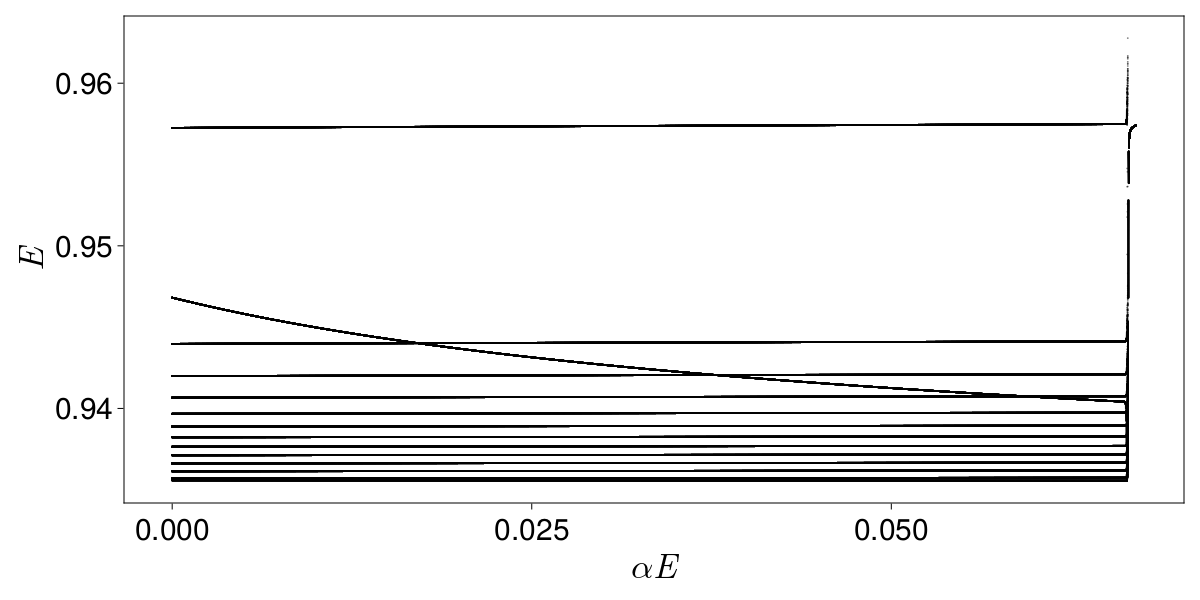

In [17]:
CairoMakie.activate!()
f = Figure(resolution = (1200, 600))
axis = Axis(f[1,1]; xlabel = L"αE", ylabel = L"E", xlabelsize = 35, ylabelsize = 35,
            xticklabelsize = 30, yticklabelsize = 30, xgridvisible = false, ygridvisible = false)
for (j, p) in enumerate(αE_range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("black", 0.5), markersize = 2.5, marker = :circle)
end
f